### Project 1

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ALookAtTheData as t
from IPython import display
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)
from collections import defaultdict


df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new opportunities",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stack Overflow,9.0,Deskto

### Question 1

**1.** Which benefits apart from salary are important to the respondents?


In [2]:
# Looking at the survey results, the column "ImportantBenefits" looked interesting.
# Let's see what's behind it

df2 = pd.read_csv('./survey_results_schema.csv')
list(df2[df2.Column == 'ImportantBenefits']['Question'])

['When it comes to compensation and benefits, other than base salary, which of the following are most important to you?']

In [3]:
# That looks exactly like what we want
# Let's have a look at what the participants say

study = df['ImportantBenefits'].value_counts().reset_index()
study.head()

,index,ImportantBenefits
0,None of these,248
1,Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options,158
2,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,135
3,Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options,126
4,Vacation/days off; Health benefits; Professional development sponsorship; Expected work hours; Remote options,106


In [4]:
# As we can see in the table above, this question allowed multiple selections per user
# Before continuing to split and evaluate the individual parameters, I would like to check for NaN values 
# This helps us check against our results later on - the number of NaN values should be reflected in a frequency table
# 1) Check how many values in total we have in the column ImportantBenefits
# 2) Check how many NaN values we have in the column ImportantBenefits

print("Total number of values: ", len(df['ImportantBenefits']))
print("Number of NaN values: ", df['ImportantBenefits'].isna().sum())

Total number of values:  19102
Number of NaN values:  7532


In [5]:
# In this step the NaN values are filled with the string "Not answered"
# Not filling out this field could be an indication that these respondents do not care about other benefits
# Removing the data all together would therefore not be a realistic depiction of the data

study_benefits_imputed = df['ImportantBenefits'].fillna("Not answered").to_frame()

study_benefits_imputed.head(5)


,ImportantBenefits
0,Stock options; Vacation/days off; Remote options
1,Not answered
2,Not answered
3,Stock options; Annual bonus; Health benefits; Equipment; Private office
4,Not answered


In [6]:
# In this quick check I wanted to make sure that all of the NaN values were actually filled
# As we can see 7532 values for "Not answered" were found, just as expected (matching our previous NaN count)

study_benefits_count = study_benefits_imputed['ImportantBenefits'].value_counts().reset_index()
study_benefits_count.head()

,index,ImportantBenefits
0,Not answered,7532
1,None of these,248
2,Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options,158
3,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,135
4,Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options,126


In [7]:
# Before continuing, let's change this index column to a more appropriate name

study_benefits_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)
study_benefits_count.head()
#type(study_benefits_imputed)

,Benefits,count
0,Not answered,7532
1,None of these,248
2,Retirement; Vacation/days off; Health benefits; Expected work hours; Remote options,158
3,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,135
4,Vacation/days off; Health benefits; Equipment; Expected work hours; Remote options,126


In [8]:
# I wanted to check whether the individual options for answering can be seen at first glance,
# when removing the duplicate values.
# However, looking at the number of unique value combinations, this does not help a lot either
# Since I am not familiar with all of the possible options, I will have to split the concatenated answers

noduplicates = study_benefits_imputed.drop_duplicates()
print("Total number of unique combinations: ",len(noduplicates))

Total number of unique combinations:  2433


In [9]:
# Going through > 2.000 entries and trying to figure out the individual inputs is way too time consuming, so
# splitting the data from the Benefits column by the '; ' (semicolon + whitespace) creating a list of the unique
# values should help understand which different answers were provided

split_benefits = []
for single_benefits in study_benefits_count['Benefits']:
    single_benefits = single_benefits.split("; ")
    split_benefits.extend(single_benefits)

uniquebenefits = set(split_benefits)
print(uniquebenefits)


{'Charitable match', 'Meals', 'Health benefits', 'Annual bonus', 'Retirement', 'Other', 'Private office', 'Education sponsorship', 'Expected work hours', 'Child/elder care', 'None of these', 'Vacation/days off', 'Remote options', 'Stock options', 'Equipment', 'Professional development sponsorship', 'Long-term leave', 'Not answered'}


In [10]:
# Now we want to see how often each of these individual values appears -
# I will use this this function to assist with process - copied from the udacity notebook

def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [11]:
# Now we can use the function and take a look at the results
# We can see that most users interested in additional vacation days / days off
# The remote options were on the second place and health benefits on third place back then in 2017.
# It would be interesting to see if this factor has become more important after Corona


study_df = total_count(study_benefits_count, 'Benefits', 'count', uniquebenefits)
study_df
# print(len(df['ImportantBenefits']))

,Benefits,count
17,Not answered,7532
11,Vacation/days off,6633
12,Remote options,6191
2,Health benefits,5481
8,Expected work hours,5232
14,Equipment,4760
15,Professional development sponsorship,4448
3,Annual bonus,3606
4,Retirement,3028
7,Education sponsorship,1930


Benefits comparison:


Text(0,0.5,'↓ Count          Benefits ID →')

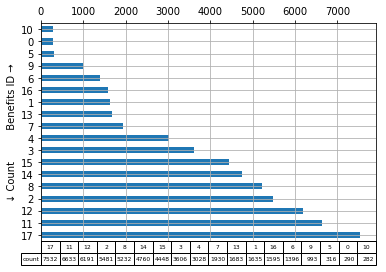

In [12]:
# The table is illustrated in this bar chart
# For easier and quicker visualizations, MS Excel is used for the final visualizations in the article

print("Benefits comparison:")
benefits_bar = study_df.plot(kind="barh",table=True,legend=False, grid=True);
benefits_bar.xaxis.tick_top()
plt.ylabel('↓ Count          Benefits ID →')

### Question 2

**2.** Now it would be interesting to know if these preferences are different depending on the current income.

So the question would be:

Of those who earn a lot / average / less than average, what are their priorities for other benefits?

In [13]:
# First let's get an idea of how salary is distributed in general
# We will be comparing salary and important benefits here

comparison = df[['Salary', 'ImportantBenefits']].copy()

# replacing the NaN values in both columns with "No answer"
# Here we want to keep the information on who did not give an information for either of the two questions, because
# for instance it might be that respondents with high salaries did not answer the additional benefits question or vice versa

comparison_filled = comparison.fillna("No answer")

comparison_filled.head(15)

,Salary,ImportantBenefits
0,No answer,Stock options; Vacation/days off; Remote options
1,No answer,No answer
2,113750,No answer
3,No answer,Stock options; Annual bonus; Health benefits; Equipment; Private office
4,No answer,No answer
5,No answer,Vacation/days off; Expected work hours
6,No answer,Health benefits; Equipment; Professional development sponsorship; Education sponsorship; Remote options
7,No answer,Equipment; Professional development sponsorship; Expected work hours; Remote options
8,No answer,Stock options; Annual bonus; Health benefits; Equipment; Remote options
9,No answer,Vacation/days off; Long-term leave; Expected work hours; Remote options; Child/elder care


Mean of salary:  58341.3985706
Maximum of salary:  195000.0


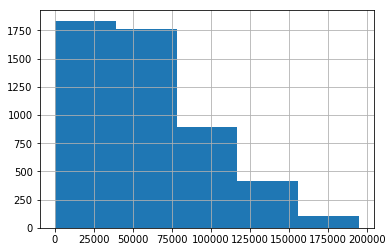

In [14]:
comparison['Salary'].hist(bins=5); # create the histogram

print("Mean of salary: ", comparison['Salary'].mean())
print("Maximum of salary: ", comparison['Salary'].max())

# We can see that the histogram is right skewed
# this suggests that the majority of the sample earns less than the average 58 k per annum

In [15]:
comparison['Salary'].describe() #getting an idea of the main descriptive stats

count    5009.000000  
mean     58341.398571 
std      40753.384986 
min      0.000000     
25%      27956.989247 
50%      51612.903226 
75%      83333.333333 
max      195000.000000
Name: Salary, dtype: float64

In [16]:
# Here I wanted to group the different salary groups into eight categories in 25k steps

bins = [0,1,25000,50000,75000,100000,125000,150000,175000,200000]
labels = ['Category_0','Category_1','Category_2','Category_3','Category_4','Category_5','Category_6','Category_7','Category_8']

comparison['Salary_Category'] = pd.cut(comparison['Salary'],bins, labels = labels)

comparison.head()

,Salary,ImportantBenefits,Salary_Category
0,NaN,Stock options; Vacation/days off; Remote options,NaN
1,NaN,NaN,NaN
2,113750.0,NaN,Category_5
3,NaN,Stock options; Annual bonus; Health benefits; Equipment; Private office,NaN
4,NaN,NaN,NaN


In [17]:
# Since these groups have different sizes, we do not need them really, it would be better to use quantiles here

comparison.drop(['Salary_Category'], axis=1)

comparison.head()


,Salary,ImportantBenefits,Salary_Category
0,NaN,Stock options; Vacation/days off; Remote options,NaN
1,NaN,NaN,NaN
2,113750.0,NaN,Category_5
3,NaN,Stock options; Annual bonus; Health benefits; Equipment; Private office,NaN
4,NaN,NaN,NaN


In [18]:
# Let's take a look at the quantile thresholds

print(set(pd.qcut(comparison['Salary'], q=4)))

{nan, Interval(51612.902999999998, 83333.332999999999, closed='right'), Interval(27956.989000000001, 51612.902999999998, closed='right'), Interval(-0.001, 27956.989000000001, closed='right'), Interval(83333.332999999999, 195000.0, closed='right')}


In [19]:
labels_quantiles = ['Q1','Q2','Q3','Q4']

comparison['Salary_quantile'] = pd.qcut(comparison['Salary'], q=4, labels = labels_quantiles)

comparison.head(10)

,Salary,ImportantBenefits,Salary_Category,Salary_quantile
0,NaN,Stock options; Vacation/days off; Remote options,NaN,NaN
1,NaN,NaN,NaN,NaN
2,113750.0,NaN,Category_5,Q4
3,NaN,Stock options; Annual bonus; Health benefits; Equipment; Private office,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,Vacation/days off; Expected work hours,NaN,NaN
6,NaN,Health benefits; Equipment; Professional development sponsorship; Education sponsorship; Remote options,NaN,NaN
7,NaN,Equipment; Professional development sponsorship; Expected work hours; Remote options,NaN,NaN
8,NaN,Stock options; Annual bonus; Health benefits; Equipment; Remote options,NaN,NaN
9,NaN,Vacation/days off; Long-term leave; Expected work hours; Remote options; Child/elder care,NaN,NaN


In [20]:
# Grouping by the quantiles does not help much, as the benefits are concatinated again

comparison_q1 = comparison.groupby("Salary_quantile")["ImportantBenefits"].value_counts().to_frame()

comparison_q1.head()

ImportantBenefits
Salary_quantile ImportantBenefits                                                                                                          
Q1              Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options   12               
                Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Expected work hours  10               
                Annual bonus; Health benefits; Equipment; Professional development sponsorship; Remote options            9                
                None of these                                                                                             9                
                Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Remote options       9

In [21]:
# In order to take a look at the first quantile only, the data is filtered first

comparison_q1 = comparison.loc[comparison.Salary_quantile == "Q1"].copy()

comparison_q1.loc[:,'ImportantBenefits'] = comparison_q1['ImportantBenefits'].fillna("Not answered")

comparison_q1.head()


,Salary,ImportantBenefits,Salary_Category,Salary_quantile
34,14838.709677,Stock options; Annual bonus; Equipment; Professional development sponsorship; Child/elder care,Category_1,Q1
52,15674.203822,Health benefits; Professional development sponsorship; Long-term leave; Remote options,Category_1,Q1
61,6636.323594,Not answered,Category_1,Q1
65,17777.777778,Not answered,Category_1,Q1
97,27548.209366,Vacation/days off; Health benefits; Remote options; Meals,Category_2,Q1


In [22]:
# Then the results are counted

comparison_q1_count = comparison_q1['ImportantBenefits'].value_counts().reset_index()

comparison_q1_count.head()

,index,ImportantBenefits
0,Not answered,372
1,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,12
2,Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Expected work hours,10
3,Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Remote options,9
4,Annual bonus; Health benefits; Equipment; Professional development sponsorship; Remote options,9


In [23]:
# Before continuing, let's change this index column to a more appropriate name

comparison_q1_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)
comparison_q1_count.head()

,Benefits,count
0,Not answered,372
1,Vacation/days off; Equipment; Professional development sponsorship; Expected work hours; Remote options,12
2,Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Expected work hours,10
3,Vacation/days off; Health benefits; Equipment; Professional development sponsorship; Remote options,9
4,Annual bonus; Health benefits; Equipment; Professional development sponsorship; Remote options,9


In [24]:
# Finally the individual values are separated, just like we did before
# These are the results for Q1

q1_count = total_count(comparison_q1_count, 'Benefits', 'count', uniquebenefits)
q1_count

,Benefits,count
11,Vacation/days off,478
12,Remote options,472
2,Health benefits,444
15,Professional development sponsorship,405
14,Equipment,393
17,Not answered,372
8,Expected work hours,366
3,Annual bonus,357
1,Meals,184
7,Education sponsorship,173


In [25]:
# Filter for Q2
comparison_q2 = comparison.loc[comparison.Salary_quantile == "Q2"].copy()

# Fill NaN values for ImportantBenefits with "Not answered" 
comparison_q2.loc[:,'ImportantBenefits'] = comparison_q2['ImportantBenefits'].fillna("Not answered")

# Count results by ImportantBenefits
comparison_q2_count = comparison_q2['ImportantBenefits'].value_counts().reset_index()

# Change labels
comparison_q2_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)

# Split results to individual ImportantBenefits
q2_count = total_count(comparison_q2_count, 'Benefits', 'count', uniquebenefits)
q2_count

,Benefits,count
11,Vacation/days off,596
12,Remote options,500
14,Equipment,472
8,Expected work hours,463
15,Professional development sponsorship,426
2,Health benefits,396
17,Not answered,323
3,Annual bonus,279
4,Retirement,225
7,Education sponsorship,136


In [26]:
# Filter for Q3
comparison_q3 = comparison.loc[comparison.Salary_quantile == "Q3"].copy()

# Fill NaN values for ImportantBenefits with "Not answered" 
comparison_q3.loc[:,'ImportantBenefits'] = comparison_q3['ImportantBenefits'].fillna("Not answered")

# Count results by ImportantBenefits
comparison_q3_count = comparison_q3['ImportantBenefits'].value_counts().reset_index()

# Change labels
comparison_q3_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)

# Split results to individual ImportantBenefits
q3_count = total_count(comparison_q3_count, 'Benefits', 'count', uniquebenefits)
q3_count

,Benefits,count
11,Vacation/days off,618
12,Remote options,516
8,Expected work hours,477
14,Equipment,433
2,Health benefits,407
15,Professional development sponsorship,366
17,Not answered,331
4,Retirement,329
3,Annual bonus,262
16,Long-term leave,138


In [27]:
# Filter for Q4
comparison_q4 = comparison.loc[comparison.Salary_quantile == "Q4"].copy()

# Fill NaN values for ImportantBenefits with "Not answered" 
comparison_q4.loc[:,'ImportantBenefits'] = comparison_q4['ImportantBenefits'].fillna("Not answered")

# Count results by ImportantBenefits
comparison_q4_count = comparison_q4['ImportantBenefits'].value_counts().reset_index()

# Change labels
comparison_q4_count.rename(columns={'index': 'Benefits', 'ImportantBenefits': 'count'}, inplace=True)

# Split results to individual ImportantBenefits
q4_count = total_count(comparison_q4_count, 'Benefits', 'count', uniquebenefits)
q4_count

,Benefits,count
11,Vacation/days off,647
2,Health benefits,613
12,Remote options,592
8,Expected work hours,486
4,Retirement,395
14,Equipment,378
15,Professional development sponsorship,308
17,Not answered,294
3,Annual bonus,286
13,Stock options,204


### Question 3

**3.** How many years of work experience can a company expect for which salary budget?

We will be using the YearsCodedJob information as a measure for experience.

- For how many years have you coded as part of your job? - 'YearsCodedJob'


In [28]:
# Let's have a look at what the participants say

YearsCodedJob_Count = df['YearsCodedJob'].value_counts().reset_index()
YearsCodedJob_Count.head(20)

,index,YearsCodedJob
0,1 to 2 years,1867
1,2 to 3 years,1755
2,3 to 4 years,1458
3,4 to 5 years,1318
4,20 or more years,1188
5,5 to 6 years,1123
6,Less than a year,1050
7,9 to 10 years,777
8,6 to 7 years,713
9,10 to 11 years,656


In [29]:
# Calculate correlation between years of coding experience and salary

YearsCodedJob_Count['YearsCodedJob'].corr(df['Salary'], method='pearson')

# As expected there is a correlation between years of experience and salary.
# However, the correlation is lower than expected.
# This means that there might be some developers with a lot of experience with a comparably low salary

0.23615793515908712

In [30]:
# Let's see which answering options there were for this question

YearsCodedJob_selection = YearsCodedJob_Count['index'].tolist()
print(YearsCodedJob_selection)

['1 to 2 years', '2 to 3 years', '3 to 4 years', '4 to 5 years', '20 or more years', '5 to 6 years', 'Less than a year', '9 to 10 years', '6 to 7 years', '10 to 11 years', '7 to 8 years', '8 to 9 years', '11 to 12 years', '15 to 16 years', '14 to 15 years', '12 to 13 years', '16 to 17 years', '13 to 14 years', '17 to 18 years', '19 to 20 years', '18 to 19 years']


In [31]:
# A quick check of the YearsCodedJob column to see if values are properly replaced with the following code
df['YearsCodedJob'].head()

0    NaN             
1    NaN             
2    20 or more years
3    9 to 10 years   
4    10 to 11 years  
Name: YearsCodedJob, dtype: object

In [32]:
df['YearsCodedJob'] = df['YearsCodedJob'].fillna(0)
df['YearsCodedJob'].head()

# The NaN values were replaced by 0, as these respondents do not seem to have work experience in coding yet

0    0               
1    0               
2    20 or more years
3    9 to 10 years   
4    10 to 11 years  
Name: YearsCodedJob, dtype: object

In [33]:
# Let's change the naming scheme here
# The number 1 for instance now indicates that the respondent has more than one year of experience, but less than two

df['YearsCodedJob'] = df['YearsCodedJob'].replace({'Less than a year':0,
                                                    '1 to 2 years':1,
                                                    '2 to 3 years':2,
                                                    '3 to 4 years':3,
                                                    '4 to 5 years':4,
                                                    '5 to 6 years':5,
                                                    '6 to 7 years':6,
                                                    '7 to 8 years':7,
                                                    '8 to 9 years':8,
                                                    '9 to 10 years':9,
                                                    '10 to 11 years':10,
                                                    '11 to 12 years':11,
                                                    '12 to 13 years':12,
                                                    '13 to 14 years':13,
                                                    '14 to 15 years':14,    
                                                    '15 to 16 years':15,
                                                    '16 to 17 years':16,
                                                    '17 to 18 years':17,
                                                    '18 to 19 years':18,
                                                    '19 to 20 years':19,
                                                    '20 or more years':20})
df['YearsCodedJob'].head(17)

0     0 
1     0 
2     20
3     9 
4     10
5     0 
6     8 
7     7 
8     7 
9     8 
10    11
11    8 
12    0 
13    15
14    20
15    1 
16    8 
Name: YearsCodedJob, dtype: int64

In [34]:
# Taking a look at the first to entries in the "Salary" column to check to following code for dropping NaN values
df['Salary'].head(10)

0   NaN      
1   NaN      
2    113750.0
3   NaN      
4   NaN      
5   NaN      
6   NaN      
7   NaN      
8   NaN      
9   NaN      
Name: Salary, dtype: float64

In [35]:
comparison_exp_salary = df.dropna(subset=['Salary'])
comparison_exp_salary['Salary'].head(10)

# Dropping the NaN values here makes sense, because we want to find out how experience influences salary

2     113750.000000
14    100000.000000
17    130000.000000
18    82500.000000 
22    100764.000000
25    175000.000000
34    14838.709677 
36    28200.000000 
37    118279.569892
52    15674.203822 
Name: Salary, dtype: float64

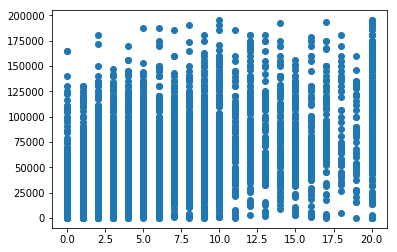

In [36]:
# Let's draw a scatter plot with the "YearsCodedJob" and "Salary"

x = comparison_exp_salary['YearsCodedJob']
y = comparison_exp_salary['Salary']

plt.scatter(x, y)

# we should be looking at the average salary per "experience group" here, to get a better idea

In [37]:
# Grouping by "YearsCodedJob" and calculating the mean salary by group

comparison_exp_salary = comparison_exp_salary.groupby(['YearsCodedJob']).mean()
comparison_exp_salary.head(21)

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
YearsCodedJob,,,,,,,
0,9286.536765,7.409594,7.267658,2.798246,8.518519,35338.445227,NaN
1,9815.854617,7.360947,6.811881,2.792969,8.437500,35278.699878,NaN
2,9684.195423,7.408451,6.980634,2.981061,8.525714,39809.037710,NaN
3,9343.080082,7.543210,6.865979,2.845188,8.443182,47783.630853,NaN
4,9405.589569,7.502283,7.024943,2.500000,8.587224,50411.908425,NaN
5,9210.303483,7.523691,6.887781,2.313514,8.471053,52545.598442,NaN
6,9771.946360,7.643678,7.091954,2.608696,8.412245,56798.069017,NaN
7,8875.382609,7.681223,7.406114,2.412371,8.403587,63627.249853,NaN
8,8817.147959,7.448980,6.943878,2.135802,8.377049,65269.768559,NaN


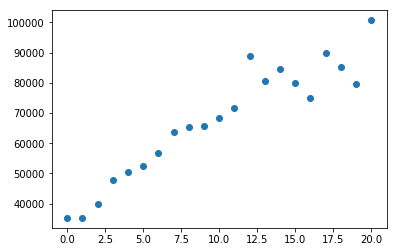

In [38]:
# Let's take a first look at the data in a scatter plot

x = list(range(0, 21))
y = comparison_exp_salary['Salary']

plt.scatter(x, y)

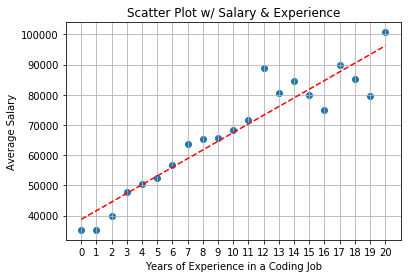

In [43]:
# Adding a reference line and a couple of details makes it easier to illustrate the relationship 
# Any group below the line will offer an above average value for money - theoretically

x = list(range(0, 21))
y = comparison_exp_salary['Salary']
plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.xticks(np.arange(min(x), max(x)+1, 1.0))

plt.xlabel('Years of Experience in a Coding Job')
plt.ylabel('Average Salary')
plt.title('Scatter Plot w/ Salary & Experience')
plt.grid(which='major', axis='both') 

plt.show()